In [2]:
import numpy as np
a = np.arange(0.0,10.02,0.12)
print (a)

[0.   0.12 0.24 0.36 0.48 0.6  0.72 0.84 0.96 1.08 1.2  1.32 1.44 1.56
 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64 2.76 2.88 3.   3.12 3.24
 3.36 3.48 3.6  3.72 3.84 3.96 4.08 4.2  4.32 4.44 4.56 4.68 4.8  4.92
 5.04 5.16 5.28 5.4  5.52 5.64 5.76 5.88 6.   6.12 6.24 6.36 6.48 6.6
 6.72 6.84 6.96 7.08 7.2  7.32 7.44 7.56 7.68 7.8  7.92 8.04 8.16 8.28
 8.4  8.52 8.64 8.76 8.88 9.   9.12 9.24 9.36 9.48 9.6  9.72 9.84 9.96]


In [63]:

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
%matplotlib inline

In [92]:
#Hyper-parameter
learning_rate = 0.03
training_epochs = 1000
display_step = 50

In [11]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
print (train_X)
n_samples = train_X.shape[0]   # 17 - it's nothing but a length
#for i in range(train_X.shape[0]):
 #   print (train_X[i])

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]
3.3
4.4
5.5
6.71
6.93
4.168
9.779
6.182
7.59
2.167
7.042
10.791
5.313
7.997
5.654
9.27
3.1


In [21]:
z = zip(train_X, train_Y)
train_data = set(z)
print (train_data)

{(10.791, 3.465), (4.168, 1.573), (5.313, 1.65), (7.997, 2.904), (9.27, 2.94), (6.93, 1.694), (3.3, 1.7), (9.779, 3.366), (5.654, 2.42), (2.167, 1.221), (3.1, 1.3), (6.71, 3.19), (6.182, 2.596), (4.4, 2.76), (7.042, 2.827), (5.5, 2.09), (7.59, 2.53)}


In [14]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")
print("Weight : %s" %W, "\n Bias :%s" %b )

Weight : <tf.Variable 'weight_1:0' shape=() dtype=float32_ref> 
 Bias :<tf.Variable 'bias_1:0' shape=() dtype=float32_ref>


In [29]:
pred = tf.add(tf.multiply(X,W),b)


In [83]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#cost = (1/n) * sum ([val**2 for val in (y-y_predicted)])
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [77]:
init = tf.global_variables_initializer()

In [ ]:
'''ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()'''

Learning Rate:  0.03
Epoch : 0050 Cost :  0.165876836 Weight : 0.40712887 Bias :  -0.38274065
Epoch : 0100 Cost :  0.138285682 Weight : 0.37959653 Bias :  -0.17980567
Epoch : 0150 Cost :  0.119306371 Weight : 0.35676453 Bias :  -0.01151639
Epoch : 0200 Cost :  0.106250159 Weight : 0.33783048 Bias :  0.12804215
Epoch : 0250 Cost :  0.097267993 Weight : 0.3221289 Bias :  0.24377495
Epoch : 0300 Cost :  0.091088131 Weight : 0.3091079 Bias :  0.33974966
Epoch : 0350 Cost :  0.086835951 Weight : 0.29830983 Bias :  0.41933933
Epoch : 0400 Cost :  0.083909728 Weight : 0.2893553 Bias :  0.4853414
Epoch : 0450 Cost :  0.081895761 Weight : 0.2819294 Bias :  0.5400761
Epoch : 0500 Cost :  0.080509461 Weight : 0.27577135 Bias :  0.58546543
Epoch : 0550 Cost :  0.079554982 Weight : 0.27066457 Bias :  0.6231063
Epoch : 0600 Cost :  0.078897662 Weight : 0.26642972 Bias :  0.65432066
Epoch : 0650 Cost :  0.078444891 Weight : 0.26291776 Bias :  0.68020636
Epoch : 0700 Cost :  0.078132905 Weight : 0.260

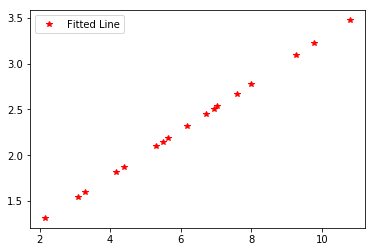

In [93]:
with tf.Session() as sess:
    sess.run(init)
    '''
    learning_rate = 0.03
training_epochs = 1000
display_step = 50 '''
    #print("W=", W.numpy(), "b=", b.numpy())
    print ("Learning Rate: ", learning_rate)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
           sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if(epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict = {X: train_X, Y: train_Y})
            print ("Epoch :", '%04d' %(epoch+1), "Cost : ", "{:.9f}".format(c), \
                  "Weight :", sess.run(W), "Bias : ", sess.run(b))
            
    print ("Optimization Finished")
   # tc = sess.run(cost,feed_dict = {X: train_X, Y: train_Y}
    #print("Training Cost :" , tc , "Weight :%d" % W, "Bias :%d" % b)
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #plt.plot(train_X,train_Y, 'r*',label="Original")
    plt.plot(train_X,sess.run(W) * train_X + sess.run(b),'r*', label = "Fitted Line")
    plt.legend()
    plt.show()

In [74]:
#Graphics Display
